In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
with h5py.File("./Input_Example_Cubes.h5") as file:
    cubes = np.array(file["cubes"])

In [4]:
with h5py.File("./Input_Discretized.jld2") as file:
    FaultCenter = np.array(file["FaultCenter"]).T

In [5]:
with h5py.File("./Input_ExternalStressChange.jld2") as file:
    # print(file.keys())
    ExternalStress_TimeArray = np.array(file["ExternalStress_TimeArray"])
    NonUniformPorePressureChange = np.array( file["NonUniformPorePressureChange"] ).T
    ExternalStress_Normal = np.array(file["ExternalStress_Normal"]).T
    # ExternalStress_Normal_Poro = np.array(file["ExternalStress_Normal_Poro"]).T
    ExternalStress_Shear = np.array(file["ExternalStress_Shear"]).T
    # ExternalStress_Shear_Poro = np.array(file["ExternalStress_Shear_Poro"]).T

In [6]:
Max_Time = ExternalStress_TimeArray[-1]
Year_in_Second = 365*24*3600 # 3e7

print("End Time in Year:", Max_Time/Year_in_Second)

End Time in Year: 19.9


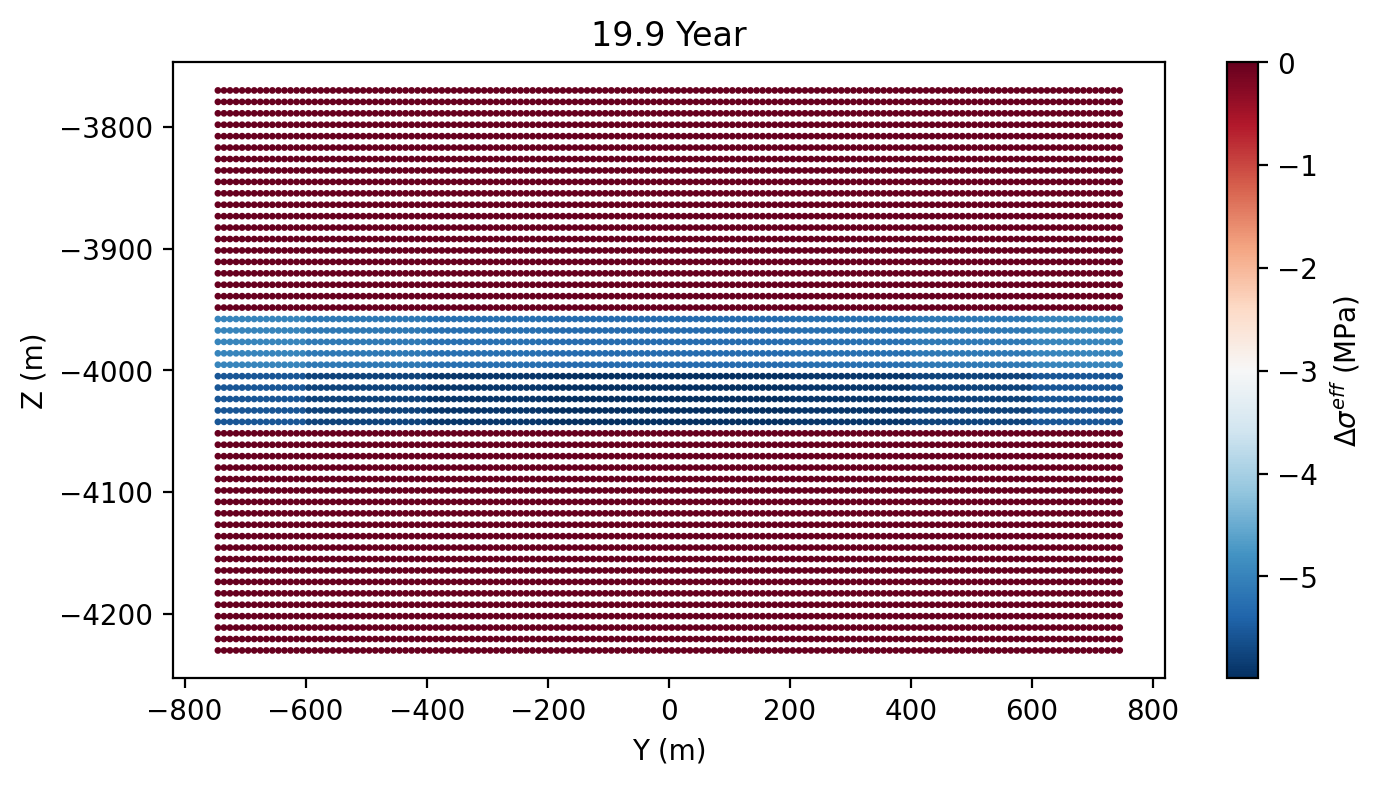

In [ ]:
TimeStep = -1

fig = plt.figure(figsize=(8,4), dpi=200)
ax1 = fig.add_subplot(111)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2], s = 2.0, 
                  c = 1e-6*ExternalStress_Normal[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label(r"$\Delta \sigma^{eff}$ (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year');
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")
# plt.savefig("image3.png")

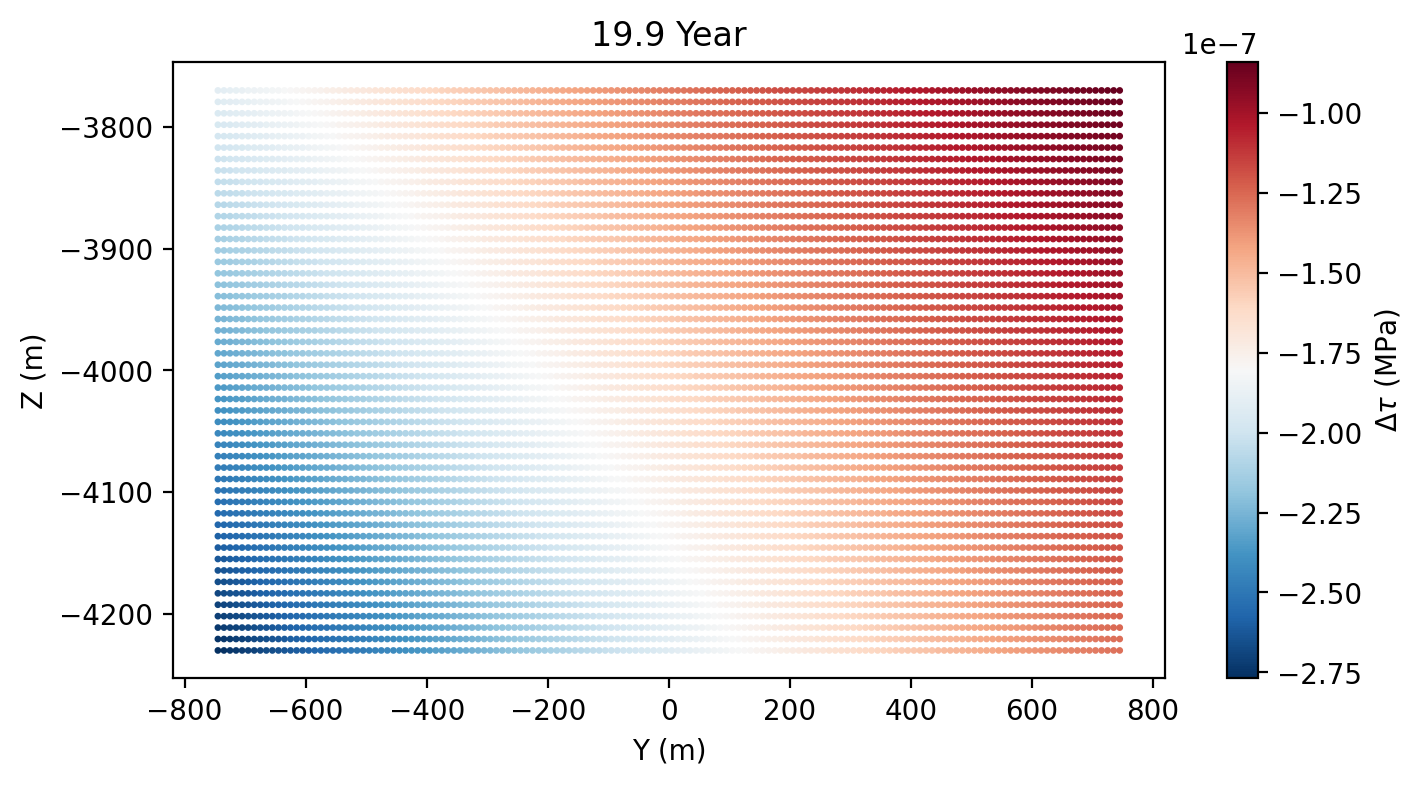

In [ ]:
TimeStep = -1

fig = plt.figure(figsize=(8,4), dpi=200)
ax1 = fig.add_subplot(111)
im1 = ax1.scatter(FaultCenter[:,1], -FaultCenter[:,2],  s = 2.0, 
                  c = 1e-6*ExternalStress_Shear[TimeStep,:], cmap='RdBu_r')
cb1 = fig.colorbar(im1, ax=ax1)
cb1.set_label(r"$\Delta \tau$ (MPa)")
plt.title(f'{ExternalStress_TimeArray[TimeStep]/Year_in_Second} Year');
plt.xlabel("Y (m)")
plt.ylabel("Z (m)")
# plt.savefig("image4.png")
